1. This code calculates the z-score of the spread, generates trading signals based on z-score thresholds, and calculates the P/L using the provided formula.


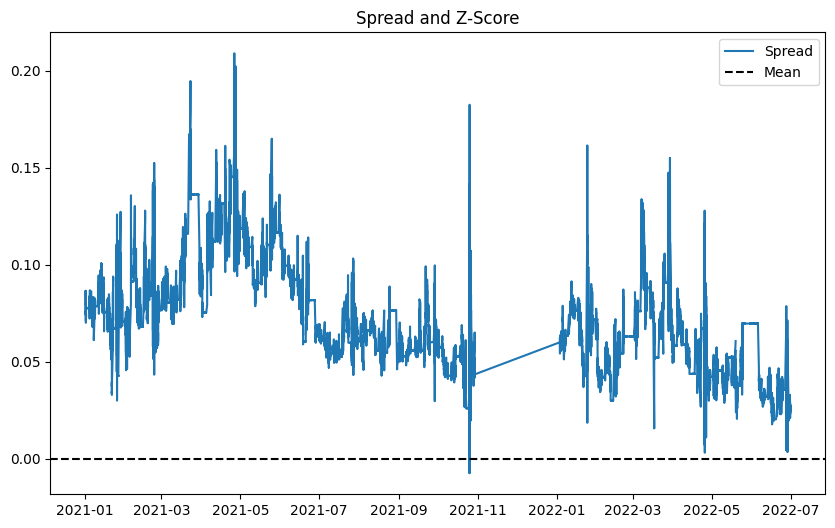

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_parquet('data.parquet')
data.head()
#we set the timestamp column as the index
data = data.between_time('09:15', '15:30')

#calculate spread
data['Spread'] = data['banknifty'] - data['nifty']

#calculate z-score
data['Z_Score'] = (data['Spread'] - data['Spread'].rolling(window=20).mean()) / data['Spread'].rolling(window=20).std()

#thresholds for entering positions
entry_threshold = 1.0
exit_threshold = 0.5

#generate trading signals
data['Signal'] = 0  # 0 for no signal, 1 for long, -1 for short
data.loc[data['Z_Score'] > entry_threshold, 'Signal'] = -1
data.loc[data['Z_Score'] < -entry_threshold, 'Signal'] = 1
data.loc[data['Z_Score'].abs() < exit_threshold, 'Signal'] = 0

#calculate P/L
data['P/L'] = data['Spread'] * (data['tte']**0.7) * data['Signal'].shift(1)

#plotting the spread and score
plt.figure(figsize=(10, 6))
plt.plot(data['Spread'], label='Spread')
plt.axhline(y=0, color='black', linestyle='--', label='Mean')
plt.legend()
plt.title('Spread and Z-Score')
plt.show()

Now, for the second deliverable, we can explore more sophisticated models. One option is to use machine learning models like regression, decision trees, or even neural networks.
Here we use a RandomForest Regressor since it is quite a popular method to perform regression.

In [14]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#feature engineering
data['Spread_Lag'] = data['Spread'].shift(1)

#we drop the missing values
data.dropna(inplace=True)

#train-test split
X_train, X_test, y_train, y_test = train_test_split(data[['Spread_Lag']], data['Spread'], test_size=0.2, random_state=42)

#using a random forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

data['Spread_Predicted'] = rf_model.predict(data[['Spread_Lag']])

# Calculate P/L using predicted spread
data['P/L_Advanced'] = data['Spread_Predicted'] * (data['tte']**0.7) * data['Signal'].shift(1)
#using mean squared error as a predictor
mse = mean_squared_error(data['Spread'], data['Spread_Predicted'])
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 9.884255230822399e-06
